In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
a = np.array([1, 5, 6, 24, 64])

In [9]:
a.mean()

20.0

In [10]:
(a.mean()*len(a) + 1) / (len(a) + 1)

16.833333333333332

<img src="res/greedy_problem.png" />

Multiarm bandits.

In [158]:
K = 5

expected_rewards = None

actual_rewards = None

comulative_rewards = {}


def reset():
    global expected_rewards
    global actual_rewards
    expected_rewards = np.zeros((K, 2)) # Q

    actual_rewards = np.random.rand(K) # q


def get_reward(action):
    return actual_rewards[action]


def update_expected_rewards(ind):
    expected_rewards[ind][0] = expected_rewards[ind][0] * expected_rewards[ind][1] + get_reward(ind)
    expected_rewards[ind][1] += 1
    expected_rewards[ind][0] /= expected_rewards[ind][1]
    return expected_rewards[ind][0]


def find_optimal_bandit(ep):
    comulative_rewards[ep] = [0]
    global comulative_reward
    for i in range(1000):
        if np.random.rand(1) <= ep:
            rand_int = np.random.randint(K)
            comulative_rewards[ep].append(comulative_rewards[ep][-1] + update_expected_rewards(rand_int))
        else:
            comulative_rewards[ep].append(comulative_rewards[ep][-1] + update_expected_rewards(expected_rewards[:, 0].argmax()))

In [159]:
reset()
find_optimal_bandit(0.0)

In [160]:
print("Epsilion", 0.0)
print("Expected rewards", expected_rewards[:, 0])
print("Actual rewards", actual_rewards)

Epsilion 0.0
Expected rewards [38.46016713  0.          0.          0.          0.        ]
Actual rewards [38.46016713 45.35995243 73.50627396 73.32556704 99.43883157]


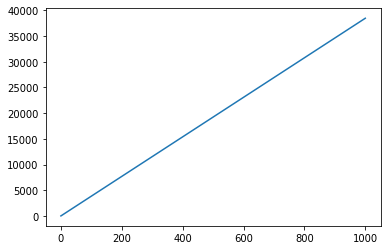

In [161]:
plt.plot(comulative_rewards[0.0])

In [162]:
reset()
find_optimal_bandit(0.1)

In [163]:
print("Epsilion", 0.1)
print("Expected rewards", expected_rewards[:, 0])
print("Actual rewards", actual_rewards)

Epsilion 0.1
Expected rewards [50.3297492  85.65332204 27.10103794  7.53487999 81.56719213]
Actual rewards [50.3297492  85.65332204 27.10103794  7.53487999 81.56719213]


Text(0, 0.5, 'Comulative reward')

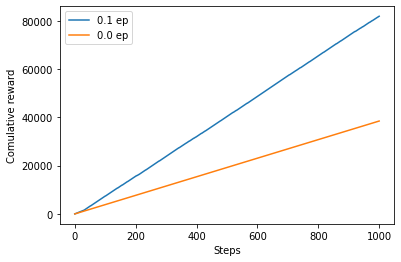

In [164]:
plt.plot(comulative_rewards[0.1])
plt.plot(comulative_rewards[0.0])
plt.legend(['0.1 ep', '0.0 ep'])
plt.xlabel("Steps")
plt.ylabel("Comulative reward")

We can see that computative sum of rewards is much higher with ep-greedy algorithm.

----------------------------------------------------------------------------------------------------

**Implementation of gradient bandits.**